## Support Vector Machine (SVM)
- **Objective:** Find the optimal hyperplane in an N-dimensional space that can separate the data points in diffrent classes in the feature space. 

- **Hyperplane:** margin between the closest points of different classes, should be as maximum as possible.
- Also known as *Maximum margin Hyperplane* or *Maximum Margin Classifier*, It contains 2 parts, (Positive & Negative hyperplane)

- Datapoints are refered to as vectors, as there can be 'N' no of planes and can't be represented using points.

<img src='https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm5.png' alt='svm image'>

### Preprocessing

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('./class_dataset/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Implementing SVM 

In [3]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear' , random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[57  1]
 [ 6 16]]


0.9125

### Visualizing the Results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


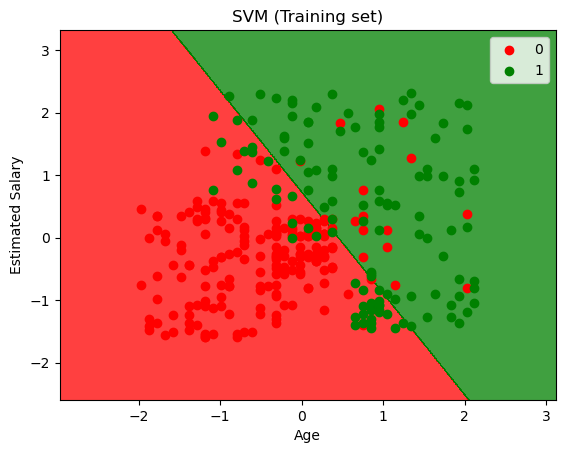

In [4]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
            np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


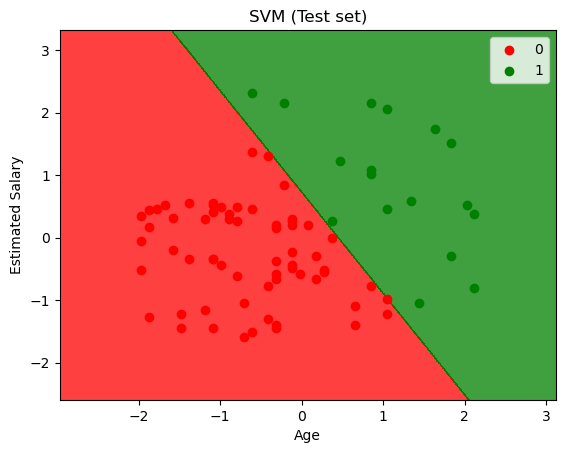

In [5]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_pred
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
            np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Importent Note
- In the current senario where Kernel used for SVM is 'linear', a straight line is formed which may now be as accurate as K-NN, because K-NN is a non-linear( has Curves ) model which can cover Uneven scattering of Data points. 

- Using a Non-linear kernal for SVM may increase the accuracy of predictions.

**Kernels play a fundamental role in transforming data into higher-dimensional spaces, enabling algorithms to learn complex patterns and relationships.**

## Types of Kernels Used in SVM
### Note:

**Process of mapping the dataset to a higher Diemention, and projecting back the the data points on 2D Space, is very resource intensive, Thus 'Tricks' or 'Equations' refered to as 'Kernal' are used to minimize the compute resources requirement.**

1. **Gaussian RBF kernal :**
    - The Radial Basis Function (RBF) kernel, Operates by measuring the similarity between data points based on their Euclidean distance.
    
    - <div>
    <img src='https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs13369-022-06654-3/MediaObjects/13369_2022_6654_Fig2_HTML.png' height = '20%'>

    <img src='https://miro.medium.com/v2/resize:fit:1400/1*kO_kAQ32-qmT-iljdZdkrQ.png' height='30%'>
    </div>
    
    where, 
    - |x-l'|<sup>2</sup> : squared Euclidean distance
    -  	&sigma; : Bandwidth of the kernel.(Circumference of circle)
    <hr>
    
    - let 'l' be a central landmark, in above case, origin(0,0) or any point can be a landmark. (Usually in the central point of all data set)
    
    - Landmark is the line in the center of the bulge, as be move closer, i.e Euclidean distance decreases (distance beteen data points), we move higher up in the 3rd (assumed) plane , finaly reaching the peak at landmark( Euclidean distance = 0).
    
    **Diffrent Height ranges in 3rd plane is used to classify data into groups.**

    - **&sigma;** role in the above equation, is deciding the dividing Boundary on the Bulge, Usualy represents the Circumference of a Circle.
    
    - Smaller the curcumference, Higher up in the 3rd axis the Boundary is, and closer to landmark, the enclosed data points are in 2D space.

    <img src='./class_photos/rbf_2k.png' width='70%'>
    
    - More then 1 Kernel, with 'n' number of  Landmark can also be used, to classify similar datapoints that are more dispersed, or If there is uneven spread of dataPoints, that can't be bounded by a single ellips of cilcular boundary.

2. **Sigmoid kernel :**
    $$ K(X,Y) = tanh()$$ 

3. **Polynomial kernal :**
    - $$ k=k$$

## Why SVR?
The main question arises that, why and how it is  called Support vector. in 3D space, even though there are no boundary, which can be folllowed by a tube.

<img src='./class_photos/nonLinearSVR.png' alt='non linear SVR image' wight='60%'>

- The spread of Data points on the '3D Bulge' is projected perpendicularlly on original 2D representation of data points on a plane. 

- Multiple Planes are used to represent, diffrent levels of data points, tipically top-most and bottom-most planes are used to represent the boundary of svr, where a 'tube' is replaced with layers of 2D-planes.

-  Data-points laying in the boundary planes are Suppourt vectors.


## Implementing RBF kernel



In [6]:
# Using SVC methord from Scikit learn library
classifier2 = SVC(kernel="rbf", random_state=0)
classifier2.fit(X_train,y_train)

# Predicting results
y_pred2 = classifier2.predict(X_test)

# Creating the Confusion matrix
cm2 = confusion_matrix(y_test,y_pred2)
print(cm2)
print(f' Accuracy is {accuracy_score(y_pred2,y_test)}\n')

print('as we can see, \n  (Non-linear) RBF has higher accuracy(95%) than A linear kernal, (91%),\n Diffrent types of Kernel are suited for diffrent type of data set,')

[[55  3]
 [ 1 21]]
 Accuracy is 0.95

as we can see, 
  (Non-linear) RBF has higher accuracy(95%) than A linear kernal, (91%),
 Diffrent types of Kernel are suited for diffrent type of data set,


### Visualizing the dataset (Non-linear kernal)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


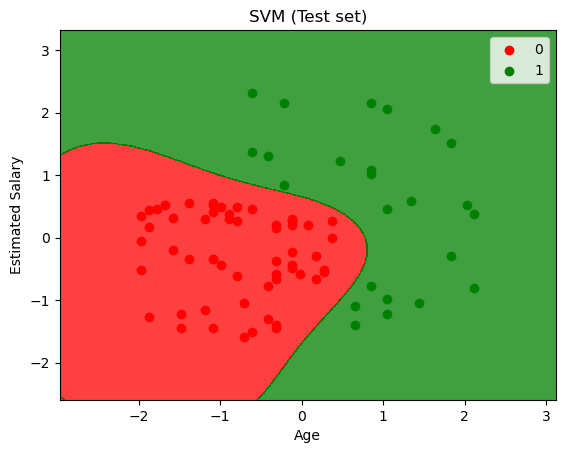

In [9]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_pred2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
            np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()